In [22]:
import numpy as np
import scipy.io as sio
import glob
from sklearn import linear_model
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
from itertools import cycle
from scipy.optimize import curve_fit
from sklearn.decomposition import PCA
from scipy.stats import sem
from scipy import stats
from scipy import ndimage
import pystan
from matplotlib import cm

%matplotlib inline

color_cycle = cycle(['g', 'b', 'c', 'm', 'y', 'k'])


import warnings
warnings.simplefilter("ignore")


import matplotlib as mpl
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'large'

%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

color_cycle = cycle(['g', 'b', 'c', 'm', 'y', 'k'])


import sys
sys.path.append('C:\\Users\\adamimos\\Documents\\GitHub\\ASAC\\python')
from import_rat_data import *
from behavior_analysis import *
#from decoder_functions import *

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import cv2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
#########################
# MOTIONPULSES ADAM0
#########################
file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\MotionPulses\\adam0_20190729.pickle",'rb')
task_data = pickle.load(file)
file.close()  

file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\MotionPulses8Dir\\adam0_20190731.pickle",'rb')
tuning_data = pickle.load(file)
file.close()   

match_tuning2task = sio.loadmat('H:\\adam0_2019_0731_0729\\match_inds.mat')['match_inds']
tune_inds = match_tuning2task[:,0]
task_inds = match_tuning2task[:,1]

FileNotFoundError: [Errno 2] No such file or directory: 'H:\\adam0_2019_0731_0729\\match_inds.mat'

In [9]:
#########################
# MOTIONPULSES ADAM0 v2
#########################
file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\MotionPulses45\\adam0_20190812b.pickle",'rb')
task_data = pickle.load(file)
file.close()  

file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\MotionPulses8Dir\\adam0_20190731.pickle",'rb')
tuning_data = pickle.load(file)
file.close()   

match_dir = 'C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\cell_alignment_data\\md_adam0_20190812b_20190731'
tune_inds = sio.loadmat(match_dir+'\\tune_inds.mat')['tune_inds']
task_inds = sio.loadmat(match_dir+'\\task_inds.mat')['task_inds']

In [118]:
#########################
# Gratings TERRY
#########################
file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\GratingsLRcontrastTask\\Terry20190214.pickle",'rb')
task_data = pickle.load(file)
file.close()  

file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\Gratings8Dir\\Terry20190216.pickle",'rb')
tuning_data = pickle.load(file)
file.close()   

tune_inds = sio.loadmat('H:\\m_Terry20190216_14\\tune_inds.mat')['tune_inds']
task_inds = sio.loadmat('H:\\m_Terry20190216_14\\task_inds.mat')['task_inds']

In [103]:
#########################
# Gratings8dir vs RDK TERRY
#########################
file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\RDKPriorsTask\\Terry20190212.pickle",'rb')
task_data = pickle.load(file)
file.close()  

file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\Gratings8Dir\\Terry20190216.pickle",'rb')
tuning_data = pickle.load(file)
file.close()   

tune_inds = sio.loadmat('H:\\m_Terry20190216_12\\tune_inds.mat')['tune_inds']
task_inds = sio.loadmat('H:\\m_Terry20190216_12\\task_inds.mat')['task_inds']

In [12]:
##############
# RDK ADAM0
##############
file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\RDKPriorsTask\\adam0_20190228.pickle",'rb')
task_data = pickle.load(file)
file.close()  

file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\Dots8dir\\Adam0_20190301.pickle",'rb')
tuning_data = pickle.load(file)
file.close()   

tune_inds = sio.loadmat('H:\\md_adam0_2019_0228_0301\\tune_inds.mat')['tune_inds']
task_inds = sio.loadmat('H:\\md_adam0_2019_0228_0301\\task_inds.mat')['task_inds']

In [14]:
def org_data_for_rasters(data_to_avg,ind_var):

    av_traces = []
    for x in np.unique(ind_var):
        data_to_avg = np.array(data_to_avg)
        av_traces.append(np.mean(data_to_avg[np.where(ind_var==x)[0],:,:],axis=0))
    av_traces = np.array(av_traces)
    
    return [data_to_avg,ind_var,av_traces]

In [15]:
task_data['completed_trials_data']['noise']

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [16]:
tune_stim_org = \
        org_data_for_rasters(tuning_data['completed_trials_data']['traces_stim_aligned'],
                             tuning_data['completed_trials_data']['stim_dir'])


task_stim_org = \
        org_data_for_rasters(task_data['completed_trials_data']['traces_stim_aligned'],
                             task_data['completed_trials_data']['correct_side'])

tune_resp_org = \
        org_data_for_rasters(tuning_data['completed_trials_data']['traces_resp_aligned'],
                             tuning_data['completed_trials_data']['response_side'])


task_resp_org = \
        org_data_for_rasters(task_data['completed_trials_data']['traces_resp_aligned'],
                             task_data['completed_trials_data']['response_side'])

In [17]:
def make_raster_plot(org_data,inds,n,sr_='stim'):
    
    # get data and plot sorted traces
    ind_var = np.array(org_data[1])
    data_to_av = org_data[0]
    plt.imshow(data_to_av[np.argsort(ind_var),inds[n],:],aspect='auto')
    
    # find locations of changes in ind var and mark them
    ind_var_ar = ind_var[np.squeeze(np.argsort(ind_var))]
    deltas = np.where([ind_var_ar[i]!=ind_var_ar[i-1] for i in np.arange(1,len(ind_var))])[0]
    for i in range(len(deltas)):
        plt.plot([20,80],[deltas[i],deltas[i]],'w--',alpha=0.4)
        #plt.arrow(30,deltas[i]-25,5*np.cos(i*np.pi/4),-5*np.sin(i*np.pi/4),color='r')
    plt.xlim([20,80])
    plt.ylim([0,len(ind_var)])
    if sr_=='stim':
        plt.plot([40,40],[0,len(ind_var)],'w--',alpha=0.4)
        plt.plot([47,47],[0,len(ind_var)],'w--',alpha=0.4)
    elif sr_=='resp':
        plt.plot([60,60],[0,len(ind_var)],'w--',alpha=0.4)

In [18]:
def plot_rasters(n):
    
    fig = plt.figure(figsize=(15,15))
    
    # PLOT FOR TUNING
    plt.subplot(2,2,1)
    make_raster_plot(tune_stim_org,tune_inds,n)
    
    plt.subplot(2,2,2)
    make_raster_plot(task_stim_org,task_inds,n)
    
    plt.subplot(2,2,3)
    make_raster_plot(tune_resp_org,tune_inds,n,sr_='resp')
    
    plt.subplot(2,2,4)
    make_raster_plot(task_resp_org,task_inds,n,sr_='resp')

interactive(children=(IntSlider(value=0, description='n', max=98), Output()), _dom_classes=('widget-interact',…

<function __main__.plot_rasters(n)>

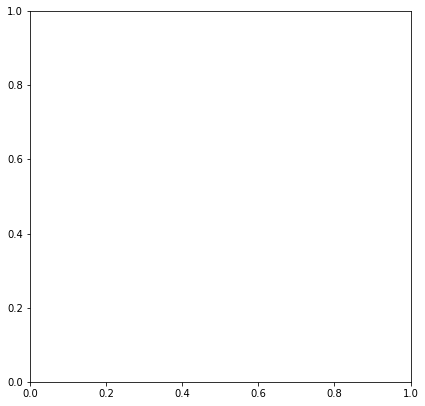

In [19]:
interact(plot_rasters,n=widgets.IntSlider(min=0,max=len(tune_inds),step=1,value=0))

4


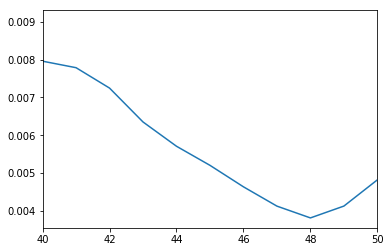

In [115]:
n =4
plt.plot(np.mean(task_data['completed_trials_data']['traces_stim_aligned'][:,task_inds[n],:],axis=0))
plt.xlim([40,50])
print(n)

4


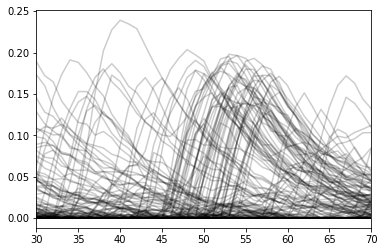

In [116]:
n =4
plt.plot(tuning_data['completed_trials_data']['traces_stim_aligned'][:,tune_inds[n],:].T,'k',alpha=0.2)
plt.xlim([30,70])
print(n)

In [117]:
data = loadmat('H:\\Terry20190212\\all_data.mat')['data']

KeyboardInterrupt: 

In [ ]:
data.keys()

In [ ]:

pickle.dump( data, open( "Terry20190212.pickle", "wb" ) )

# Make 2 way decoder for relevant 45 degree directions for 8 way day.

In [67]:
def make_decoder2(data, category_to_decode,time_inds = np.arange(40,55),n_repeats=25):
    repeat_data = []
    bar = pyprind.ProgBar(n_repeats, track_time=True)
    
    traces = data['completed_trials_data']['traces_stim_aligned']
    
    # we need to balance our dataset between all the types of stimulii and responses
    resp = data['completed_trials_data']['response_side']
    stim = data['completed_trials_data']['correct_side']

    # get the labels for the responses and the stimulii
    resp_un = np.unique(resp)
    stim_un = np.unique(stim)

    # make a list of the product of these two vectors
    prod = list(itertools.product(resp_un,stim_un))

    # number them in a dictionary
    prod_dict = dict(zip(prod, range(len(prod))))

    # convert the combos to unique numbers
    unique_types = [prod_dict[resp[i],stim[i]] for i in range(len(resp))]


    
    for r in range(n_repeats):
        rus = RandomUnderSampler()
            # finally, do the undersampling
        X = data['completed_trials_data']['traces_stim_aligned'][:,:,0]
        y = unique_types
        X_resampled, y_resampled = rus.fit_resample(X, y)
        rus_indices = rus.sample_indices_
        #print(len(rus_indices))
            
        # split data into ten pieces
        np.random.shuffle(rus_indices)
        split_inds = np.array_split(rus_indices,5)
        acc_per_split = []
        for i in range(len(split_inds)):
            testing_inds = split_inds[i]
            training_inds = np.setdiff1d(rus_indices, testing_inds)
            
            X = traces[:,:,time_inds]
            X = X[training_inds,:,:]
            X = X.transpose(0,2,1)
            X = np.reshape(X,(X.shape[0]*X.shape[1],X.shape[2]))
            y = data['completed_trials_data'][category_to_decode][training_inds]
            y = np.repeat(y,len(time_inds))
            model = linear_model.LogisticRegression(penalty='l2',C=100000)
            model.fit(X,y)

            #print(model.score(X,y))

            # Get accuracy at every point in time of the testing data
            acc_ = [] # holds accuracy at every ppint in time for a given split
            for t in range(traces.shape[2]):
                predictions = model.predict(traces[testing_inds,:,t])
                y_ = data['completed_trials_data'][category_to_decode][testing_inds]
                acc_.append(np.mean(predictions == y_))
            acc_per_split.append(acc_)    

        repeat_data.append(np.mean(acc_per_split,axis=0))
        bar.update()
    return np.mean(repeat_data,axis=0)    
        

0% [#########################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:06


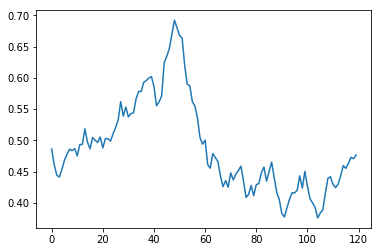

In [68]:
import pyprind
%matplotlib inline
import itertools
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import cross_validate
plt.plot(make_decoder2(task_data,'correct_side'))